In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [307]:
fraud=pd.read_csv("A:/Data Science/assignments/Desicion/Fraud_check.csv")

In [308]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [309]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [310]:
fraud.rename(columns={'Marital.Status':'Martial', 'Taxable.Income':'Income', 'City.Population':'Population','Work.Experience':'Exp'},inplace=True)

In [311]:
fraud['group']=np.where(fraud['Income']<=30000,'Risky','Good')

In [312]:
fraud.group.value_counts()

Good     476
Risky    124
Name: group, dtype: int64

In [313]:
y_test.group.value_counts()

Good     94
Risky    26
Name: group, dtype: int64

In [314]:
x_train.shape

(480, 5)

In [315]:
fraud.columns

Index(['Undergrad', 'Martial', 'Income', 'Population', 'Exp', 'Urban',
       'group'],
      dtype='object')

In [316]:
fraud.group.value_counts()

Good     476
Risky    124
Name: group, dtype: int64

In [216]:
fraud.corr()

,Income,Population,Exp
Income,1.000000,-0.064387,-0.001818
Population,-0.064387,1.000000,0.013135
Exp,-0.001818,0.013135,1.000000


In [317]:
from sklearn.preprocessing import LabelEncoder

In [318]:
lab=LabelEncoder()
Martial=lab.fit_transform(fraud.Martial)
Undergrad=lab.fit_transform(fraud.Undergrad)
Urban=lab.fit_transform(fraud.Urban)

In [320]:
fraud.head()

,Undergrad,Martial,Income,Population,Exp,Urban,group
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [324]:
fraud.Undergrad=fraud.Undergrad.astype(object)
fraud.Martial=fraud.Martial.astype(object)
fraud.Urban=fraud.Urban.astype(object)


In [325]:
fraud.dtypes

Income         int64
Population     int64
Exp            int64
group         object
Undergrad     object
Martial       object
Urban         object
dtype: object

In [321]:
del fraud['Undergrad']
del fraud['Martial']
del fraud['Urban']

In [322]:
fraud['Undergrad']=Undergrad
fraud['Martial']=Martial
fraud['Urban']=Urban

In [326]:
fraud.columns

Index(['Income', 'Population', 'Exp', 'group', 'Undergrad', 'Martial',
       'Urban'],
      dtype='object')

In [327]:
X=fraud[[ 'Population', 'Exp', 'Undergrad', 'Martial',
       'Urban']]
y=fraud[['group']]

In [328]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [329]:
from imblearn.over_sampling import SMOTE

In [330]:
so=SMOTE()
x_train1,y_train1=so.fit_sample(x_train,y_train)

In [331]:
y_train1.group.value_counts()

Good     382
Risky    382
Name: group, dtype: int64

In [332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score,KFold

In [333]:
model_1=DecisionTreeClassifier(criterion='gini').fit(x_train1,y_train1)

In [334]:
model_1.score(x_train1,y_train1)

1.0

In [335]:
model_1.score(x_test,y_test)

0.6

In [336]:
#Model is overfitting applying bagging.

In [354]:
bag=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5),n_estimators=100,random_state=10).fit(x_train1,y_train1)

In [342]:
values=bag.predict(x_test)

In [355]:
bag.score(x_test,y_test)

0.7833333333333333

In [356]:
bag.score(x_train1,y_train1)

0.8167539267015707

In [357]:
from sklearn.metrics import confusion_matrix

In [358]:
confusion_matrix(y_test,values)

array([[83, 11],
       [22,  4]], dtype=int64)

In [359]:
y_test.group.value_counts()

Good     94
Risky    26
Name: group, dtype: int64

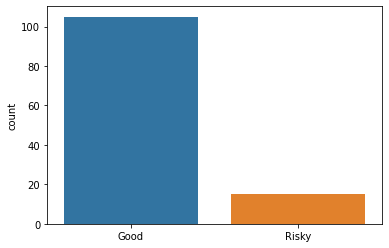

In [362]:
sns.countplot(values)

In [275]:
pd.crosstab(y_test.group,values)

col_0,Good,Risky
group,,
Good,84,10
Risky,25,1
